## Assignment 3: $k$ Nearest Neighbor and Visualization Nora Wiktorowicz

**Do two questions from K and 1 from visualization.**

`! git clone https://github.com/ds4e/knn`

Assignment: Exploratory
! git clone https://github.com/ds4e/visualization

# K Nearest Neighbor

# **Q0.**
**1. What is the difference between regression and classification?**


In machine learning, regression is a statistical method that is utilized when we want to predict numerical or continuous values (such as price). In contrast, classification is used when we want to work with discrete values (yes/no, 2 different categories, etc.).

**2.What is a confusion table? What does it help us understand about a model's performance?**

A confusion table tells us a summary of the performance of the model. It shows us the number of correct versus incorrect predictions in each class. This helps us to understand the model's performance by showing us which part of the model is inaccurate and weakest (meaning it has the highest number of incorrect predicitions). This allows us to adjust the model to improve it, or adjust our interpretations.

**3.What does the SSE quantify about a particular model?**

SSE (sum of squared errors) shows us the difference between observed and predicted values. In other words, it quantifies the variation in the model (the difference between what was actually and observed and what the model predicts). This quantifies the "error" of the model.

**4.What are overfitting and underfitting?**

Overfitting is when a model is too complicated and overtrains on the data used to train it. Then, when new data is introduced, it does not fit the new data and does not have accurate generalizations. Underfitting is when a model is too simple, and does not have accurate or proper generalizations on either the training or test data.

**5.Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?**

Splitting the data into training and test sets, and choosing k by evaluating accuracy or SSE on the test set, improves model performance because it reduces the likelihood for overfitting. Through dividing the data into training and test sets, we are able to first train the model, and then test the model on the test data to ensure that overfitting is not occuring. Therefore, it shows us how the model will work, allowing for repeated testing. It removes any biases in testing how well the model is able to adapt when given new data.  

**6.With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach**

With classification, we can report a class label as a prediction or a probability distribution over class labels. These two approaches both have strengths and weaknesses. Reporting a class label as a prediction is easier to do, more time and cost-effective, and better when the model is confident about a singular classification. However, it also may lead to confusing information (doesn't account for more complex scenarios, such as when different classifications have high similarity in likelihood), and it does not tell us the level of certainty the model has in its classification (which may allow to over-reliance on this data in our analysis). Reporting a class label as a probability distribution over class labels allows us to reflect a more complex/specific interpretation (beyond just the "most likely" classification), and allow us to interpret/analyze the likelihood of each classification (which may lead to a more effective analysis and conclusions with a more well-rounded "big picture"). However, it may be more complex to interpret, timely, and require further interpretation.  

# **Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

***1.Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables. ***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! git clone https://github.com/ds4e/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 66 (delta 10), reused 6 (delta 6), pack-reused 39 (from 1)
Receiving objects: 100% (66/66), 13.84 MiB | 7.50 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [3]:
df = pd.read_csv('/content/wrangling/assignment/data/airbnb_hw.csv', low_memory = False)
df = df.loc[:, ["Review Scores Rating", "Price", "Beds"]]
print(df.shape, '/n')
df.head()

(30478, 3) /n


,Review Scores Rating,Price,Beds
0,NaN,145,1.0
1,NaN,37,1.0
2,NaN,28,1.0
3,NaN,199,3.0
4,96.0,549,3.0


**2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.**

In [4]:
df_missing_review = df[df["Review Scores Rating"].isnull()]
print(df_missing_review.head())

    Review Scores Rating Price  Beds
0                    NaN   145   1.0
1                    NaN    37   1.0
2                    NaN    28   1.0
3                    NaN   199   3.0
13                   NaN    68   1.0


**3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.**

In [6]:
df = df.dropna(subset=["Review Scores Rating"])
print(df.head())

   Review Scores Rating Price  Beds
4                  96.0   549   3.0
5                 100.0   149   1.0
6                 100.0   250   1.0
7                  94.0    90   1.0
8                  90.0   270   2.0


**4.For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.) ****

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


df["Price"] = pd.to_numeric(df["Price"], errors='coerce')
df["Beds"] = pd.to_numeric(df["Beds"], errors='coerce')
X = df[["Price", "Beds"]]
y = df["Review Scores Rating"]
df = df.dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split training and testing data 80/20 (recommended by stack overflow and other online resources)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
errors = [] #iterate over reasonable values of k
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    sse = mean_squared_error(y_test, y_pred) * len(y_test)  #get the calculation of our SSE
    errors.append(sse)
optimal_k = k_values[np.argmin(errors)] #find a value that minimizes SSE on the test split using predictions
print(f"Best k: {optimal_k}")
final_knn = KNeighborsRegressor(n_neighbors=optimal_k) #train the model with the most optimal k
final_knn.fit(X_train_scaled, y_train)
final_predictions = final_knn.predict(X_test_scaled)
final_sse = mean_squared_error(y_test, final_predictions) * len(y_test) #test and evaluate the model
print(f"Minimized SSE with k={optimal_k}: {final_sse}")


Best k: 15
Minimized SSE with k=15: 330436.6977777778


You choose K as the value that minimizes the SSE. We did this by iterating over reasonable values of k, testing, and then training the model based on the most optimal value of k (15). Therefore, our model is using 15 nearest neighbors to predict Review Scores Rating.

**5.Predict the missing ratings.**

In [24]:
missing = df_missing_review[["Price", "Beds"]] #using the df_missing_review that I saved above
missing['Price'] = missing['Price'].str.replace(',', '', regex=True).astype(float) #clean to ensure price is numeric
missing = missing.dropna()
missing_scaled = scaler.transform(missing)
filtered_df = df[df["Review Scores Rating"].isnull()]
filtered_df.loc[:, "Review Scores Rating"] = final_knn.predict(missing_scaled)[:len(filtered_df)]
df.update(filtered_df)
print(df.head())


   Review Scores Rating  Price  Beds
4                  96.0  549.0   3.0
5                 100.0  149.0   1.0
6                 100.0  250.0   1.0
7                  94.0   90.0   1.0
8                  90.0  270.0   2.0


<ipython-input-24-9d4ee66c6438>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing['Price'] = missing['Price'].str.replace(',', '', regex=True).astype(float) #clean to ensure price is numeric


In the table above, we see the prediction for the missing ratings. For example, listings with 3 beds are predicted to have a rating of 96, lower than what the output rating may look like for a listing with 1 bed.

**6.Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.**

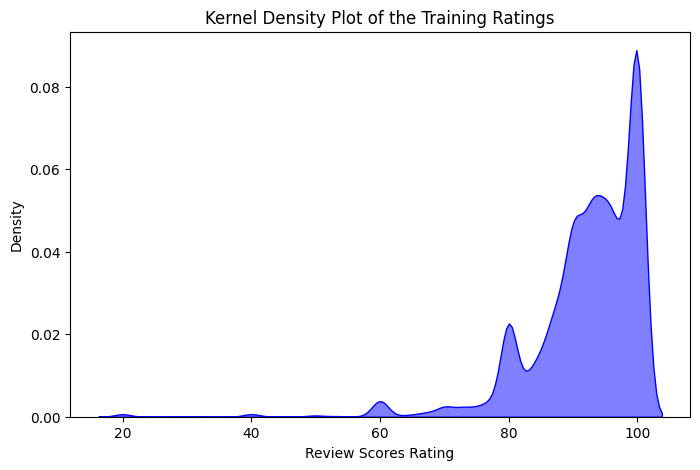

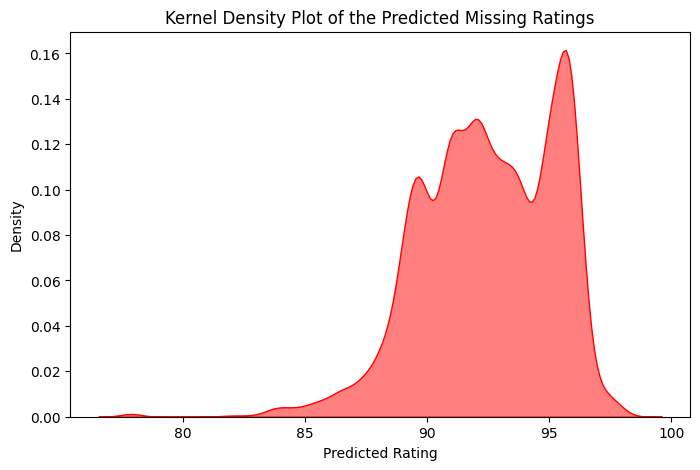

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

#kernel density plot of the training ratings
plt.figure(figsize=(8, 5))
sns.kdeplot(y_train, fill=True, color="blue", alpha=0.5)
plt.title("Kernel Density Plot of the Training Ratings")
plt.xlabel("Review Scores Rating")
plt.ylabel("Density")
plt.show()

#kernel density plot of the predicted missing ratings
predicted_missing_ratings = final_knn.predict(missing_scaled)
plt.figure(figsize=(8, 5))
sns.kdeplot(predicted_missing_ratings, fill=True, color="red", alpha=0.5)
plt.title("Kernel Density Plot of the Predicted Missing Ratings")
plt.xlabel("Predicted Rating")
plt.ylabel("Density")
plt.show()


The plots have a somewhat similar shape, with both skewed left. This shows that, for the most part, more guests left ratings when the ratings were somewhat high/positive. We see that for the kernel density plot of the training ratings, there are the highest density of ratings that are around 100. In contrast, the kernel density plot of predicted missing ratings is a bit more of an even distribution, with the highest density when the predicted ratings are around 96. This may occur for several reasons. For example, the distribution of the missing rating data may be more likely to be missing from less enthusiastic reviews (reflecting in the density peaks around 92 and 96). This causes the predicted rating plot to be shifted towards the left, toward more moderate reviews. This may be because guests that have neither had an atrocious or amazing expirience are less likely to take the time to leave a review.

# Visualization

# Q4

**Write your own function to make a kernel density plot.**

The user should pass in a Pandas series or Numpy array.
The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
You can use Matplotlib or Seaborn's .lineplot, but not an existing function that creates kernel density plots.
You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn kdeplot.

We covered the Gaussian and uniform kernels in class, but the Epanechnikov kernel is also usable (formulas given).

In order to make your code run reasonably quickly, consider using the pdist or cdist functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing for loops will be slow, but that's fine.

In [46]:
df = pd.read_csv('/content/wrangling/assignment/data/airbnb_hw.csv', low_memory = False)

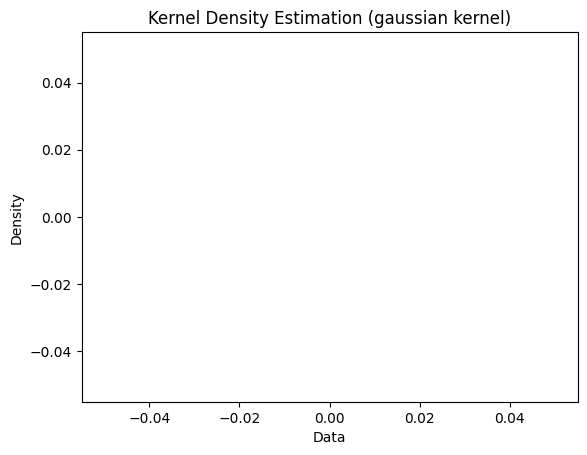

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

# Custom KDE function
def my_kde(data, bandwidth=None, kernel='gaussian', **kwargs):
    """
    Create a kernel density estimate plot manually.

    Parameters:
        - data: Pandas Series or Numpy array of data points
        - bandwidth: Bandwidth of the kernel. If None, use Silverman's plug-in estimate
        - kernel: Type of kernel ('gaussian', 'uniform', 'epanechnikov')
        - kwargs: Additional arguments for plotting (like color, label, etc.)
    """
    data = np.asarray(data)  # Convert input data to a numpy array if not already

    # Calculate bandwidth if not provided
    if bandwidth is None:
        n = len(data)
        std_dev = np.std(data)
        bandwidth = (4 / (3 * n)) ** (1 / 5) * std_dev  # Silverman's rule of thumb

    # Kernel function selection
    def gaussian_kernel(x):
        return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x ** 2)

    def uniform_kernel(x):
        return 0.5 * (np.abs(x) <= 1)

    def epanechnikov_kernel(x):
        return 3/4 * (1 - x**2) * (np.abs(x) <= 1)

    # Select the kernel function based on user input
    if kernel == 'gaussian':
        kernel_func = gaussian_kernel
    elif kernel == 'uniform':
        kernel_func = uniform_kernel
    elif kernel == 'epanechnikov':
        kernel_func = epanechnikov_kernel
    else:
        raise ValueError("Kernel type unknown")

    # Compute the kernel density estimate
    grid = np.linspace(np.min(data) - 3 * bandwidth, np.max(data) + 3 * bandwidth, 500)
    distances = cdist(grid.reshape(-1, 1), data.reshape(-1, 1), metric='euclidean')
    kernels = kernel_func(distances / bandwidth)
    density = np.sum(kernels, axis=1) / (len(data) * bandwidth)  # Calculate density

    # Plot the KDE using Seaborn
    sns.lineplot(x=grid, y=density, **kwargs)
    plt.title(f'Kernel Density Estimation ({kernel} kernel)')
    plt.xlabel('Data')
    plt.ylabel('Density')
    plt.show()

# Now, test it using the Airbnb data (e.g., 'Price')
df = pd.read_csv('/content/wrangling/assignment/data/airbnb_hw.csv', low_memory=False)
df_clean = df.dropna(subset=['Price'])  # Remove missing Price values
# Convert 'Price' column to numeric, handling errors
df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')
data = df_clean['Price']  # Extract Price column for KDE

# Call the custom KDE function for Price
my_kde(data, kernel='gaussian', color='blue')


In [62]:
#necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import seaborn as sns

def my_kde(data, bandwidth=None, kernel='gaussian', **kwargs): #default should be gaussian, as stated above

    #if it is not already, the data must be converted to numeric to be able to be plotted in a kdp
    if isinstance(data, pd.Series) or isinstance(data, pd.DataFrame):
        if data.dtype == object:

            #create a numpy array and bandwdidth
            data = np.asarray(data) #first, a numpy array must be created
            n = len(data)

            if bandwidth is None:  #next, the bandwidth must be calculated
                std_dev = np.std(data)
                bandwidth = (4 / (3 * n))**(1 / 5) * std_dev #utilizing the numbers from silverman's rule of thumb to calculate the bandwidth.

            #the type of kernel must be defined and calculated
            def gaussian_kernel(x):
                return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x ** 2) #rearranging and utilizing the gaussian kernel formula provided in instructions

            def uniform_kernel(x):
                return 0.5 * (np.abs(x) <= 1) #rearranging and utilizing the uniform kernel formula provided in instructions

            def epanechnikov_kernel(x):
                return 3/4 * (1 - x**2) * (np.abs(x) <= 1) #rearranging and utilizing the epanechnikov kernel formula provided in instructions

            #create a decision making function to select which kernel to use in the rest of the code
            if kernel == 'gaussian':
                kernel_func = gaussian_kernel
            elif kernel == 'uniform':
                kernel_func = uniform_kernel
            elif kernel == 'epanechnikov':
                kernel_func = epanechnikov_kernel
            else:
                raise ValueError("Kernel type unknown") #if the kernel types are not guassian, uniform, or epanechnikov, this error message will appear

            #find the kernel density estimate
            grid = np.linspace(np.min(data) - 3*bandwidth, np.max(data) + 3*bandwidth, 500) #After expiriementation, I chose to settle with a grid size of 500. This allowed for more detail, without creating a rough curve (when testing with 400, the edges and curve were not smooth).
            distances = cdist(grid.reshape(-1, 1), data.reshape(-1, 1), metric='euclidean') #used cdist to make code run quickly, as suggested in instructions
            kernels = kernel_func(distances / bandwidth)
            density = np.sum(kernels, axis=1) / (n * bandwidth) #calculates the KDE

            #create the kernel density plot
            sns.lineplot(x=grid, y=density, **kwargs) #utilized seaborn.lineplot, as suggested in the instructions
            plt.title(f'Kernel Density Estimation ({kernel} kernel)')
            plt.xlabel('Data')
            plt.ylabel('Density')
            plt.show()

    #now, test it using dataset from class - I selected the airbnb data
    df = pd.read_csv('/content/wrangling/assignment/data/airbnb_hw.csv', low_memory=False)
    plt.figure(figsize=(8, 5))
    plt.plot(grid, kde, label=f'KDE ({kernel})', **kwargs)
    plt.title(f'Kernel Density Estimate for Price with {kernel} Kernel')
    plt.xlabel('Price')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

**Test with dataset from class. Compare with seaborn kdplot.**

<ipython-input-60-0a10b6d34d60>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


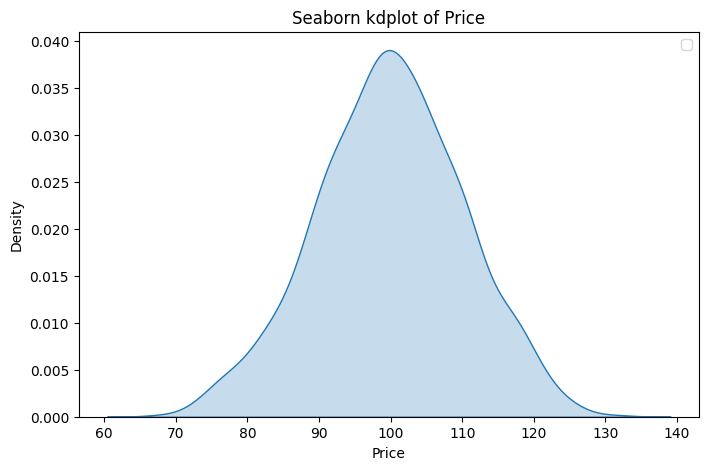

In [60]:
#seaborn kdplot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.kdeplot(data, fill=True,)
plt.title("Seaborn kdplot of Price")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.show()